Gradient Descent: b0 = 58.99575534501908, b1 = -0.14051010142548373
Sklearn: b0 = 59.021, b1 = -0.1405702265821338
Predicted daughter's height for mother height 63: 58.76893919850225
MSE: 1.3681363076187876
RMSE: 1.169673590203176


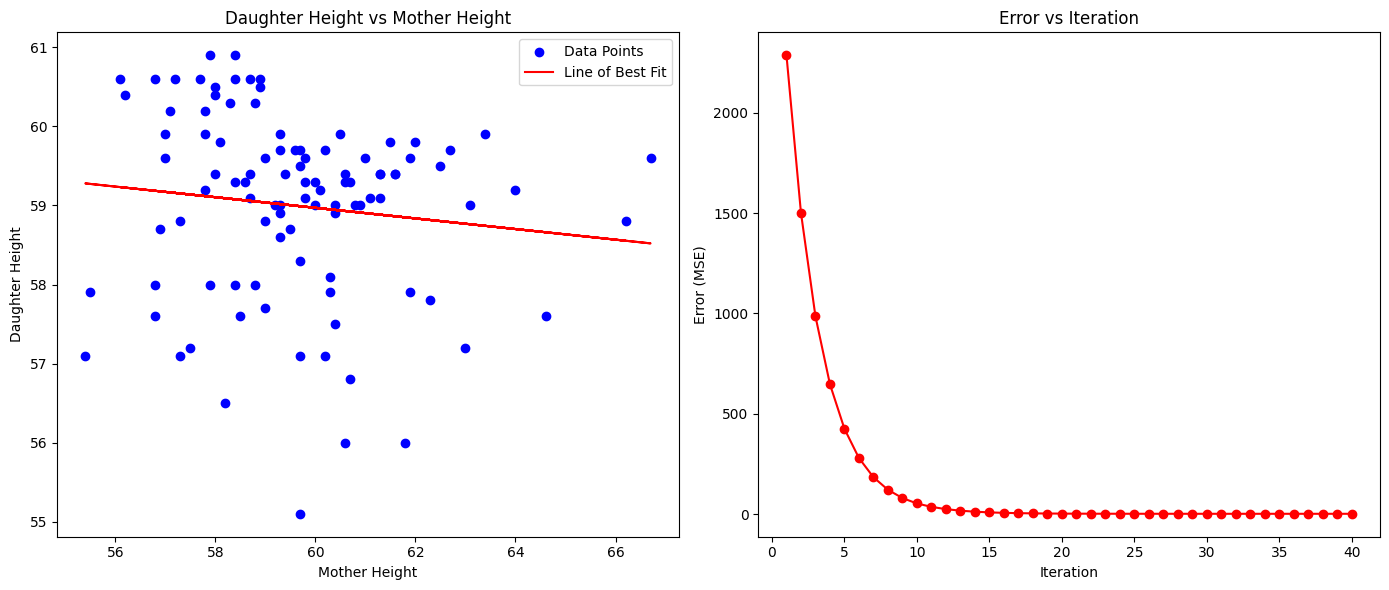

In [4]:
# Question 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('height.csv')

X = df[['mother']].values
y = df['daughter'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

class LinearRegressionGD:
    def __init__(self, learning_rate=0.1, epochs=40):
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def fit(self, X, y):
        self.m, self.n = X.shape
        # theta is the array of the parameters
        self.theta = np.zeros(self.n + 1)  # remember to add one for the intercept
        X_b = np.c_[np.ones((self.m, 1)), X]  # concatenate to get the intercept term
        self.costs = []
        
        for epoch in range(self.epochs):
            if epoch%10 == 0:
                # print(self.learning_rate)
                self.learning_rate *= 0.95
            
            gradients = -2/self.m * X_b.T.dot(y - X_b.dot(self.theta))
            self.theta -= self.learning_rate * gradients
            cost = np.mean((y - X_b.dot(self.theta)) ** 2)
            self.costs.append(cost)
        
        self.b0, self.b1 = self.theta[0], self.theta[1]
    
    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  
        return X_b.dot(self.theta) # dot product with the parameters

model_gd = LinearRegressionGD()
model_gd.fit(X_scaled, y)

model_sklearn = LinearRegression()
model_sklearn.fit(X_scaled, y)

b0_gd, b1_gd = model_gd.b0, model_gd.b1
b0_sklearn, b1_sklearn = model_sklearn.intercept_, model_sklearn.coef_[0]

print(f"Gradient Descent: b0 = {b0_gd}, b1 = {b1_gd}")
print(f"Sklearn: b0 = {b0_sklearn}, b1 = {b1_sklearn}")

# Predict daughter's height for a mother height of 63
mother_height_new = np.array([[63]])
mother_height_new_scaled = scaler.transform(mother_height_new)
predicted_height = model_gd.predict(mother_height_new_scaled)
print(f"Predicted daughter's height for mother height 63: {predicted_height[0]}")

# errors
y_pred = model_gd.predict(X_scaled)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, model_gd.predict(X_scaled), color='red', label='Line of Best Fit')
plt.xlabel('Mother Height')
plt.ylabel('Daughter Height')
plt.title('Daughter Height vs Mother Height')
plt.legend()

# error vs iteration
plt.subplot(1, 2, 2)
plt.plot(range(1, len(model_gd.costs) + 1), model_gd.costs, color='red', marker='o')
plt.xlabel('Iteration')
plt.ylabel('Error (MSE)')
plt.title('Error vs Iteration')

plt.tight_layout()
plt.show()


Gradient Descent: b0 = -0.06508931158252446, b1 = 4.1112538249920965
Sklearn: b0 = 0.01025706351143364, b1 = 1.4982089411105624
Accuracy: 1.0


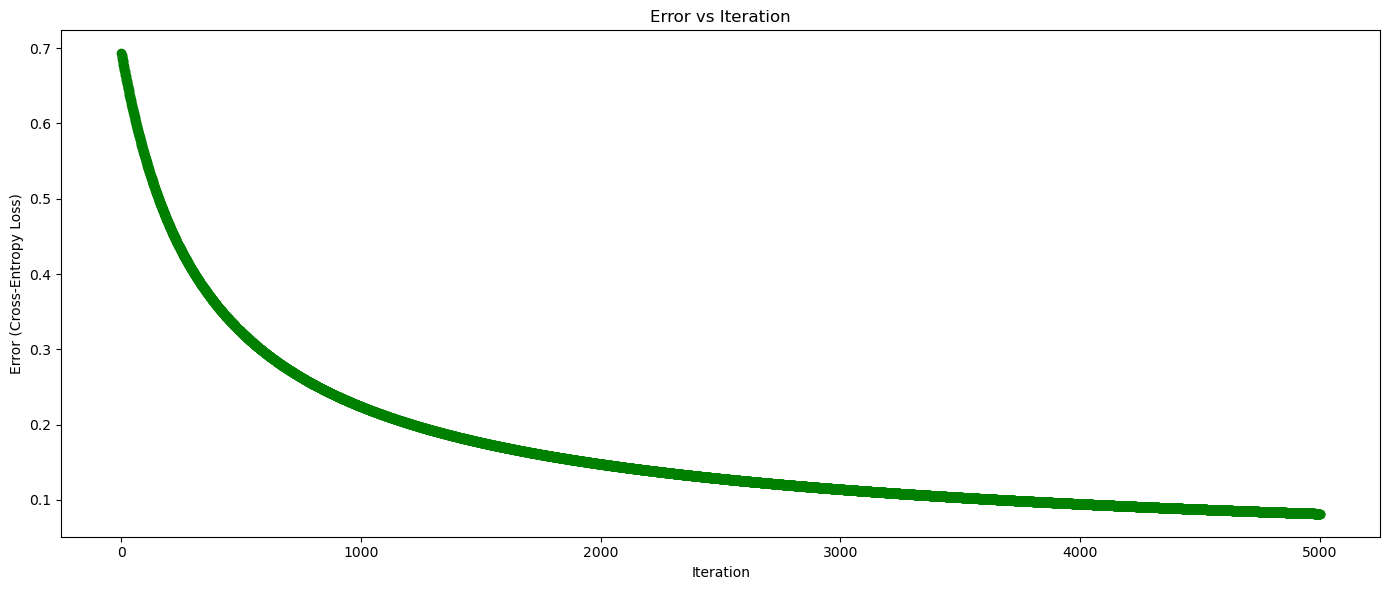

In [51]:
# Question 2 and 3, works for binomial classification and multinomial classification


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv('study1.csv')
# df = pd.read_csv('study2.csv')

X = df.drop(columns = 'Pass').values
y = df['Pass'].values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=5000):
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        self.m, self.n = X.shape
        self.theta = np.zeros(self.n + 1)  # add one for the intercept
        X_b = np.c_[np.ones((self.m, 1)), X]  # concatenate intercept
        self.costs = []
        
        for epoch in range(self.epochs):
            z = X_b.dot(self.theta)
            predictions = self.sigmoid(z)
            errors = predictions - y
            gradients = 1/self.m * X_b.T.dot(errors)
            self.theta -= self.learning_rate * gradients
            cost = -1/self.m * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
            self.costs.append(cost)
        
        self.b0, self.b1 = self.theta[0], self.theta[1]
    
    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  
        probabilities = self.sigmoid(X_b.dot(self.theta))
        return (probabilities >= 0.3).astype(int), probabilities

model_gd = LogisticRegressionGD()
model_gd.fit(X_scaled, y)

model_sklearn = LogisticRegression()
model_sklearn.fit(X_scaled, y)

b0_gd, b1_gd = model_gd.b0, model_gd.b1
b0_sklearn, b1_sklearn = model_sklearn.intercept_[0], model_sklearn.coef_[0][0]

print(f"Gradient Descent: b0 = {b0_gd}, b1 = {b1_gd}")
print(f"Sklearn: b0 = {b0_sklearn}, b1 = {b1_sklearn}")

y_pred_gd, prob_gd = model_gd.predict(X_scaled)
accuracy = accuracy_score(y, y_pred_gd)
print(f"Accuracy: {accuracy}")

if X.shape[1] == 1:
    new_hours = np.array([[3.5], [7.5]])
    new_hours_scaled = scaler.transform(new_hours)
    _, prob_pass = model_gd.predict(new_hours_scaled)
    print(f"Probability of passing with 3.5 hours of study: {prob_pass[0]}")
    print(f"Probability of passing with 7.5 hours of study: {prob_pass[1]}")

# error vs Iteration
plt.figure(figsize=(14, 6))
plt.plot(range(1, len(model_gd.costs) + 1), model_gd.costs, color='green', marker='o')
plt.xlabel('Iteration')
plt.ylabel('Error (Cross-Entropy Loss)')
plt.title('Error vs Iteration')

plt.tight_layout()
plt.show()
